In [2]:
import json

from sqlalchemy import create_engine
import pandas as pd

from data_generator.main import DiscriminationData
from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results8.db')
conn = create_engine(f'sqlite:///{DB_PATH}')
query = """
with s1 as (SELECT ex.experiment_id,
                   am.analysis_id,
                   am.method_name,
                   ex.status,
                   er.group_key,

                   json_extract(ex.config, '$.aequitas_global_iteration_limit') as aequitas_global_iteration_limit,
                   json_extract(ex.config, '$.aequitas_local_iteration_limit')  as aequitas_local_iteration_limit,
                   json_extract(ex.config, '$.aequitas_model_type')             as aequitas_model_type,
                   json_extract(ex.config, '$.aequitas_perturbation_unit')      as aequitas_perturbation_unit,
                   json_extract(ex.config, '$.aequitas_threshold')              as aequitas_threshold,
                   json_extract(ex.config, '$.bias_scan_favorable_value')       as bias_scan_favorable_value,
                   json_extract(ex.config, '$.bias_scan_mode')                  as bias_scan_mode,
                   json_extract(ex.config, '$.bias_scan_n_estimators')          as bias_scan_n_estimators,
                   json_extract(ex.config, '$.bias_scan_num_iters')             as bias_scan_num_iters,
                   json_extract(ex.config, '$.bias_scan_random_state')          as bias_scan_random_state,
                   json_extract(ex.config, '$.bias_scan_scoring')               as bias_scan_scoring,
                   json_extract(ex.config, '$.bias_scan_test_size')             as bias_scan_test_size,
                   json_extract(ex.config, '$.expga_max_global')                as expga_max_global,
                   json_extract(ex.config, '$.expga_max_local')                 as expga_max_local,
                   json_extract(ex.config, '$.expga_threshold')                 as expga_threshold,
                   json_extract(ex.config, '$.expga_threshold_rank')            as expga_threshold_rank,
                   json_extract(ex.config, '$.max_group_size')                  as max_group_size,
                   json_extract(ex.config, '$.max_number_of_classes')           as max_number_of_classes,
                   json_extract(ex.config, '$.min_number_of_classes')           as min_number_of_classes,
                   json_extract(ex.config, '$.mlcheck_iteration_no')            as mlcheck_iteration_no,
                   json_extract(ex.config, '$.nb_attributes')                   as nb_attributes,
                   json_extract(ex.config, '$.nb_categories_outcome')           as nb_categories_outcome,
                   json_extract(ex.config, '$.nb_groups')                       as nb_groups,
                   json_extract(ex.config, '$.prop_protected_attr')             as prop_protected_attr,

                   CAST(er.calculated_aleatoric_group AS float)                       AS calculated_aleatoric,
                   CAST(er.calculated_epistemic_group AS float)                       AS calculated_epistemic,

                   CAST(er.calculated_granularity AS float)                     AS calculated_granularity,
                   CAST(er.calculated_group_size AS float)                      AS calculated_group_size,
                   CAST(er.calculated_intersectionality AS float)               AS calculated_intersectionality,
                   CAST(er.calculated_magnitude AS float)                       AS calculated_magnitude,
                   CAST(er.calculated_similarity AS float)                      AS calculated_similarity,
                   CAST(er.calculated_subgroup_ratio AS float)                  AS calculated_subgroup_ratio,
                   CAST(er.calculated_uncertainty_group AS float)                     AS calculated_uncertainty,

                   CAST(er.synthetic_group_size AS integer)                     AS synthetic_group_size,
                   CAST(er.nb_unique_indv AS integer)                           AS nb_unique_indv,

                   CAST(er.num_exact_couple_matches AS integer)                 AS num_exact_couple_matches,
                   CAST(er.num_new_group_couples AS integer)                    AS num_new_group_couples,
                   num_new_group_couples / CAST(nb_unique_indv AS FLOAT)        as prop_of_new_individuals_found,
                   num_exact_couple_matches / CAST(nb_unique_indv AS FLOAT)   as prop_of_orig_individuals_found


            FROM experiments ex
                     join main.analysis_metadata am on ex.experiment_id = am.experiment_id
                     left join main.evaluated_results er on am.analysis_id = er.analysis_id
            WHERE status = 'completed')
SELECT *
FROM s1
-- ORDER BY prop_of_new_individuals_found DESC
"""

df = pd.read_sql_query(query, conn)
df = df.loc[:, ~df.T.duplicated()]
df = df[(~df['prop_of_new_individuals_found'].isna())&(~df['prop_of_orig_individuals_found'].isna())]
df

,experiment_id,analysis_id,method_name,status,group_key,aequitas_global_iteration_limit,aequitas_local_iteration_limit,aequitas_model_type,aequitas_perturbation_unit,aequitas_threshold,...,calculated_intersectionality,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,nb_unique_indv,num_exact_couple_matches,num_new_group_couples,prop_of_new_individuals_found,prop_of_orig_individuals_found
0,30bc5987-6976-420d-a7d6-47c8c6c41dfd,035b7d00-ae7e-44e7-bc35-1bfdc1cf04d2,aequitas,completed,*|0|*|*|*|0|*|0|*|*-*|2|*|*|*|1|*|1|*|*,25,3,RandomForest,0.25,0.2,...,1.0,0.047183,0.000000,0.278741,0.043249,191,0,0,0.0,0.0
1,30bc5987-6976-420d-a7d6-47c8c6c41dfd,035b7d00-ae7e-44e7-bc35-1bfdc1cf04d2,aequitas,completed,*|1|*|*|*|*|0|*|*|*-*|0|*|*|*|*|0|*|*|*,25,3,RandomForest,0.25,0.2,...,1.0,0.149543,0.500000,0.430001,0.044025,204,0,0,0.0,0.0
2,30bc5987-6976-420d-a7d6-47c8c6c41dfd,035b7d00-ae7e-44e7-bc35-1bfdc1cf04d2,aequitas,completed,*|1|*|*|*|1|0|2|3|*-*|2|*|*|*|0|1|1|3|*,25,3,RandomForest,0.25,0.2,...,1.0,0.261058,0.200000,0.141902,0.068715,167,0,0,0.0,0.0
3,30bc5987-6976-420d-a7d6-47c8c6c41dfd,035b7d00-ae7e-44e7-bc35-1bfdc1cf04d2,aequitas,completed,*|1|3|2|1|1|1|2|*|*-*|0|1|2|1|0|1|0|*|*,25,3,RandomForest,0.25,0.2,...,1.0,0.235033,0.428571,0.073641,0.082332,57,0,0,0.0,0.0
4,30bc5987-6976-420d-a7d6-47c8c6c41dfd,035b7d00-ae7e-44e7-bc35-1bfdc1cf04d2,aequitas,completed,*|2|*|*|2|1|*|1|*|*-*|1|*|*|2|1|*|1|*|*,25,3,RandomForest,0.25,0.2,...,1.0,0.122046,0.750000,0.194223,0.052483,186,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37610,9078d66a-7428-4013-ba27-4d396a79cf59,a08c41fb-4cc9-4d65-83cb-c9e1f75bd0fb,biasscan,completed,3|*|*|1|0|2|1|1|1|1|1|*|*|2|*-1|*|*|0|0|2|0|0|...,100,10,RandomForest,1.00,0.0,...,4.0,0.212882,0.300000,0.104067,0.089733,565,0,0,0.0,0.0
37611,9078d66a-7428-4013-ba27-4d396a79cf59,a08c41fb-4cc9-4d65-83cb-c9e1f75bd0fb,biasscan,completed,3|*|1|0|*|*|1|0|2|*|2|*|*|1|*-1|*|1|1|*|*|0|1|...,100,10,RandomForest,1.00,0.0,...,3.0,0.228571,0.125000,0.188362,0.093103,16,0,0,0.0,0.0
37612,9078d66a-7428-4013-ba27-4d396a79cf59,a08c41fb-4cc9-4d65-83cb-c9e1f75bd0fb,biasscan,completed,3|0|1|0|*|1|1|1|1|0|1|2|*|2|1-1|0|0|0|*|1|1|0|...,100,10,RandomForest,1.00,0.0,...,5.0,0.322917,0.461538,0.252962,0.099165,128,0,0,0.0,0.0
37613,9078d66a-7428-4013-ba27-4d396a79cf59,a08c41fb-4cc9-4d65-83cb-c9e1f75bd0fb,biasscan,completed,3|1|*|1|*|0|*|*|2|*|*|1|*|1|*-2|0|*|0|*|1|*|*|...,100,10,RandomForest,1.00,0.0,...,3.0,0.331081,0.000000,0.411134,0.089040,481,0,0,0.0,0.0



Analysis for prop_of_new_individuals_found:
--------------------------------------------------

calculated_aleatoric:
Average Treatment Effect: -0.0013
Correlation: -0.0194
P-value: 0.0002

calculated_epistemic:
Average Treatment Effect: 0.0015
Correlation: 0.0221
P-value: 0.0000

calculated_granularity:
Average Treatment Effect: -0.0017
Correlation: -0.0298
P-value: 0.0000

calculated_group_size:
Average Treatment Effect: -0.0017
Correlation: -0.0192
P-value: 0.0002

calculated_intersectionality:
Average Treatment Effect: -0.0018
Correlation: -0.0216
P-value: 0.0000

calculated_magnitude:
Average Treatment Effect: -0.0011
Correlation: -0.0146
P-value: 0.0047

calculated_similarity:
Average Treatment Effect: 0.0021
Correlation: 0.0257
P-value: 0.0000

calculated_subgroup_ratio:
Average Treatment Effect: 0.0009
Correlation: 0.0140
P-value: 0.0065

calculated_uncertainty:
Average Treatment Effect: -0.0009
Correlation: -0.0110
P-value: 0.0335

Analysis for prop_of_orig_individuals_found:

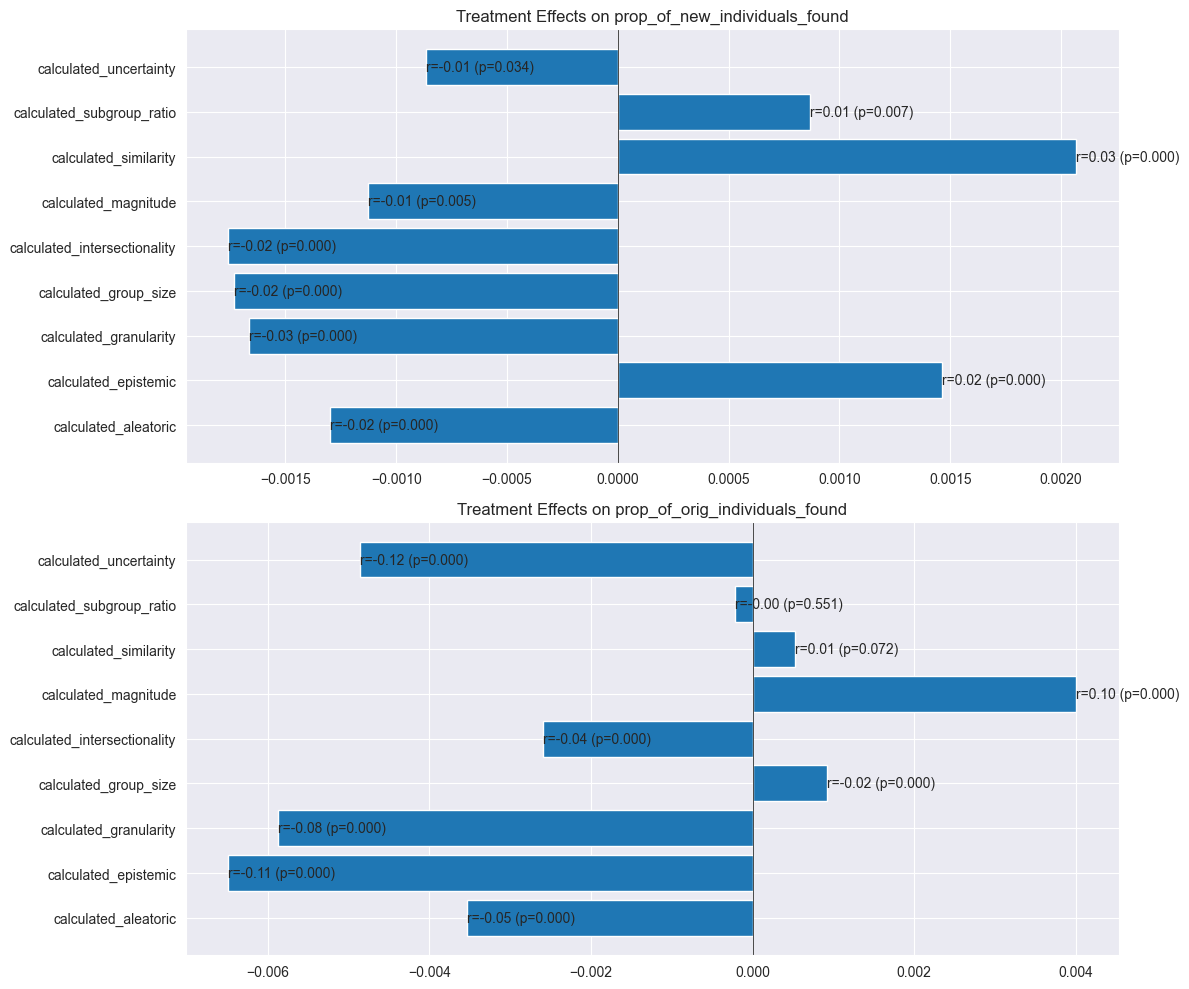

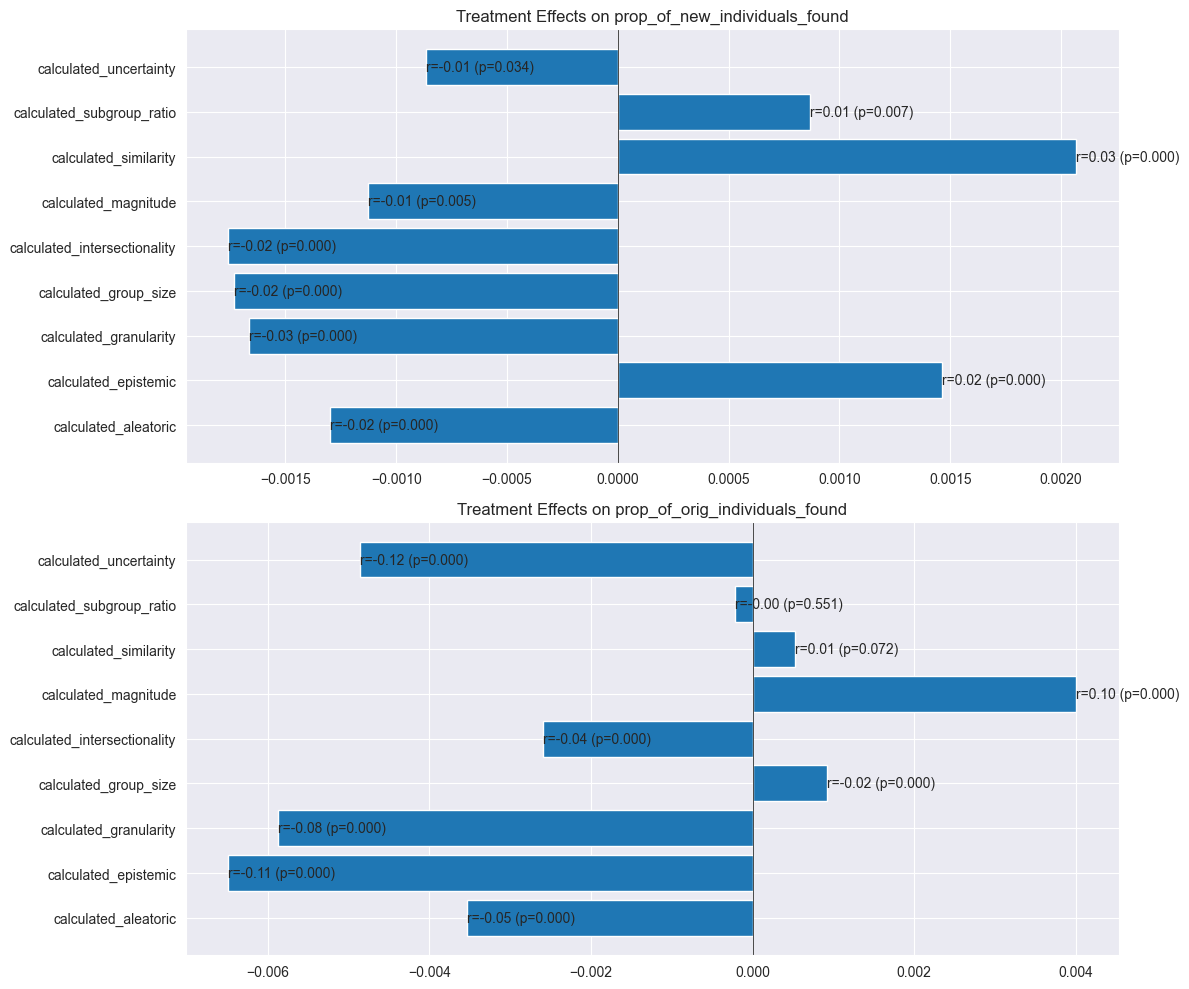

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_treatment_effects(df):
    # Get calculated columns (treatments) and outcome columns
    treatment_cols = [col for col in df.columns if col.startswith('calculated_')]
    outcome_cols = ['prop_of_new_individuals_found', 'prop_of_orig_individuals_found']

    # Initialize results dictionary
    results = {
        'treatment_effects': {},
        'correlations': {},
        'significance': {}
    }

    # Standardize treatment variables
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(df[treatment_cols]), columns=treatment_cols)

    # Analyze each outcome
    for outcome in outcome_cols:
        y = df[outcome]

        # 1. Basic correlation analysis
        correlations = {}
        for treatment in treatment_cols:
            corr, p_value = stats.pearsonr(df[treatment], y)
            correlations[treatment] = {
                'correlation': corr,
                'p_value': p_value
            }

        # 2. CATE Analysis using Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

        treatment_effects = {}
        for treatment in treatment_cols:
            # Create binary treatment indicator (above/below median)
            treatment_median = df[treatment].median()
            T = (df[treatment] > treatment_median).astype(int)

            # Prepare features (excluding current treatment)
            X_subset = X.drop(columns=[treatment])

            # Fit model
            rf_model.fit(X_subset, y)

            # Calculate CATE
            treated_effect = rf_model.predict(X_subset[T == 1]).mean()
            control_effect = rf_model.predict(X_subset[T == 0]).mean()
            ate = treated_effect - control_effect

            treatment_effects[treatment] = {
                'ATE': ate,
                'treated_mean': treated_effect,
                'control_mean': control_effect
            }

        results['treatment_effects'][outcome] = treatment_effects
        results['correlations'][outcome] = correlations

    return results

def plot_treatment_effects(results):
    # Create figure with subplots for each outcome
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for idx, outcome in enumerate(results['treatment_effects'].keys()):
        treatments = list(results['treatment_effects'][outcome].keys())
        effects = [results['treatment_effects'][outcome][t]['ATE'] for t in treatments]

        # Plot treatment effects
        ax = axes[idx]
        bars = ax.barh(treatments, effects)
        ax.set_title(f'Treatment Effects on {outcome}')
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

        # Add correlation values as text
        for i, treatment in enumerate(treatments):
            corr = results['correlations'][outcome][treatment]['correlation']
            p_val = results['correlations'][outcome][treatment]['p_value']
            ax.text(effects[i], i, f'r={corr:.2f} (p={p_val:.3f})',
                   verticalalignment='center')

    plt.tight_layout()
    return fig


# Run analysis
results = analyze_treatment_effects(df)

# Print detailed results
for outcome in results['treatment_effects'].keys():
    print(f"\nAnalysis for {outcome}:")
    print("-" * 50)

    for treatment in results['treatment_effects'][outcome].keys():
        effect_info = results['treatment_effects'][outcome][treatment]
        corr_info = results['correlations'][outcome][treatment]

        print(f"\n{treatment}:")
        print(f"Average Treatment Effect: {effect_info['ATE']:.4f}")
        print(f"Correlation: {corr_info['correlation']:.4f}")
        print(f"P-value: {corr_info['p_value']:.4f}")

# Create visualization
plot_treatment_effects(results)